In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm

In [2]:
df = pd.read_excel('dataset/Bank_Personal_Loan_Modelling.xlsx', sheet_name= 1)

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
## remove unnecessary columns

df.drop(['ID', 'ZIP Code'], axis =1, inplace=True)

In [6]:
y = df['Personal Loan']
X = df.drop('Personal Loan', axis =1)

In [7]:
X1 = sm.add_constant(X)

In [8]:
Logistic = sm.Logit(y, X1)

result = Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Tue, 11 Aug 2020   Pseudo R-squ.:                  0.5938
Time:                        00:51:42   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""

In [10]:
dfresult = pd.read_html(result.summary().tables[1].as_html(), header=0, index_col=0)[0]
dfresult

,coef,std err,z,P>|z|,[0.025,0.975]
const,-12.1928,1.645,-7.411,0.000,-15.417,-8.968
Age,-0.0536,0.061,-0.874,0.382,-0.174,0.067
Experience,0.0638,0.061,1.046,0.295,-0.056,0.183
Income,0.0546,0.003,20.831,0.000,0.049,0.060
Family,0.6958,0.074,9.364,0.000,0.550,0.841
CCAvg,0.1240,0.040,3.127,0.002,0.046,0.202
Education,1.7362,0.115,15.088,0.000,1.511,1.962
Mortgage,0.0005,0.001,0.856,0.392,-0.001,0.002
Securities Account,-0.9368,0.286,-3.277,0.001,-1.497,-0.377
CD Account,3.8225,0.324,11.800,0.000,3.188,4.457


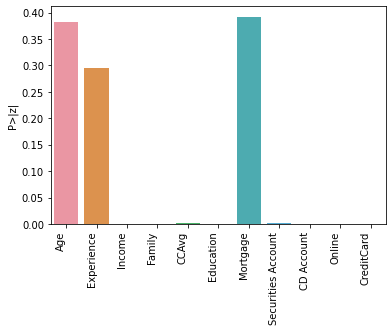

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plot = sns.barplot(x = dfresult.index[1:], y= dfresult['P>|z|'].drop('const', axis =0))
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')


plt.show()

## Significant Independent Value with p value < 0.05

In [12]:
dfresult[dfresult['P>|z|'] < 0.05].drop('const')

,coef,std err,z,P>|z|,[0.025,0.975]
Income,0.0546,0.003,20.831,0.000,0.049,0.060
Family,0.6958,0.074,9.364,0.000,0.550,0.841
CCAvg,0.1240,0.040,3.127,0.002,0.046,0.202
Education,1.7362,0.115,15.088,0.000,1.511,1.962
Securities Account,-0.9368,0.286,-3.277,0.001,-1.497,-0.377
CD Account,3.8225,0.324,11.800,0.000,3.188,4.457
Online,-0.6752,0.157,-4.298,0.000,-0.983,-0.367
CreditCard,-1.1197,0.205,-5.462,0.000,-1.522,-0.718


## Final Equation is

p('Personal Loan') = 1/(1 + e^-(12.1928 + 0.0546(Income) + 0.6958(Family) + 0.124(CCavg) + 1.7362(Education)
                               -0.9368(Securities Account) + 3.8225(CD account) - 0.6752(Online) - 
                               1.1197 (Creditcard)))